<br>NAMA : NURUL HADI<br>
<br>NIM : 211351109<br>
<br>KELAS : INFORMATIKA MALAM A<br>

# IMPORT DATASET

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurulhadiiiiiiiii","key":"bdf1c1266468cc63702e9efd52eff28e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 114MB/s]


In [ ]:
!mkdir ccdata
!unzip ccdata.zip -d ccdata
!ls ccdata

Archive:  ccdata.zip
  inflating: ccdata/CC GENERAL.csv   
'CC GENERAL.csv'


# IMPORT LIBRARY YANG DIGUNAKAN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df =pd.read_csv('/content/ccdata/CC GENERAL.csv')

# DATA DISCOVERY

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [ ]:
df.describe().T.style.background_gradient(cmap = 'Spectral')

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.000000,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.138560
BALANCE_FREQUENCY,8636.000000,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,8636.000000,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.570000
INSTALLMENTS_PURCHASES,8636.000000,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.000000
CASH_ADVANCE,8636.000000,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.211760
PURCHASES_FREQUENCY,8636.000000,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8636.000000,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.000000
CASH_ADVANCE_FREQUENCY,8636.000000,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.500000
CASH_ADVANCE_TRX,8636.000000,3.313918,6.912506,0.000000,0.000000,0.000000,4.000000,123.000000
PURCHASES_TRX,8636.000000,15.033233,25.180468,0.000000,1.000000,7.000000,18.000000,358.000000


In [ ]:
df.shape

(8636, 17)

# EDA

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 59.7 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


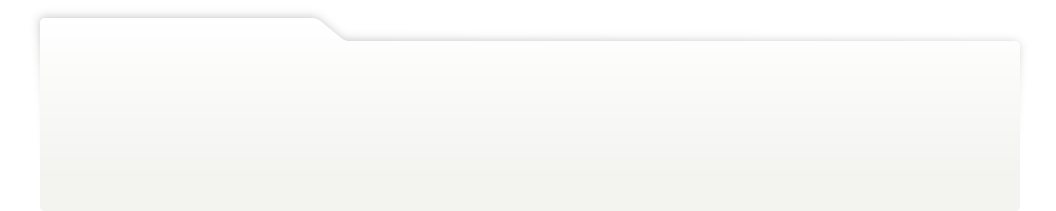
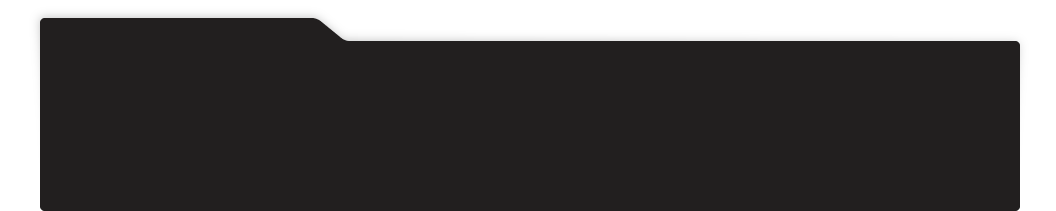
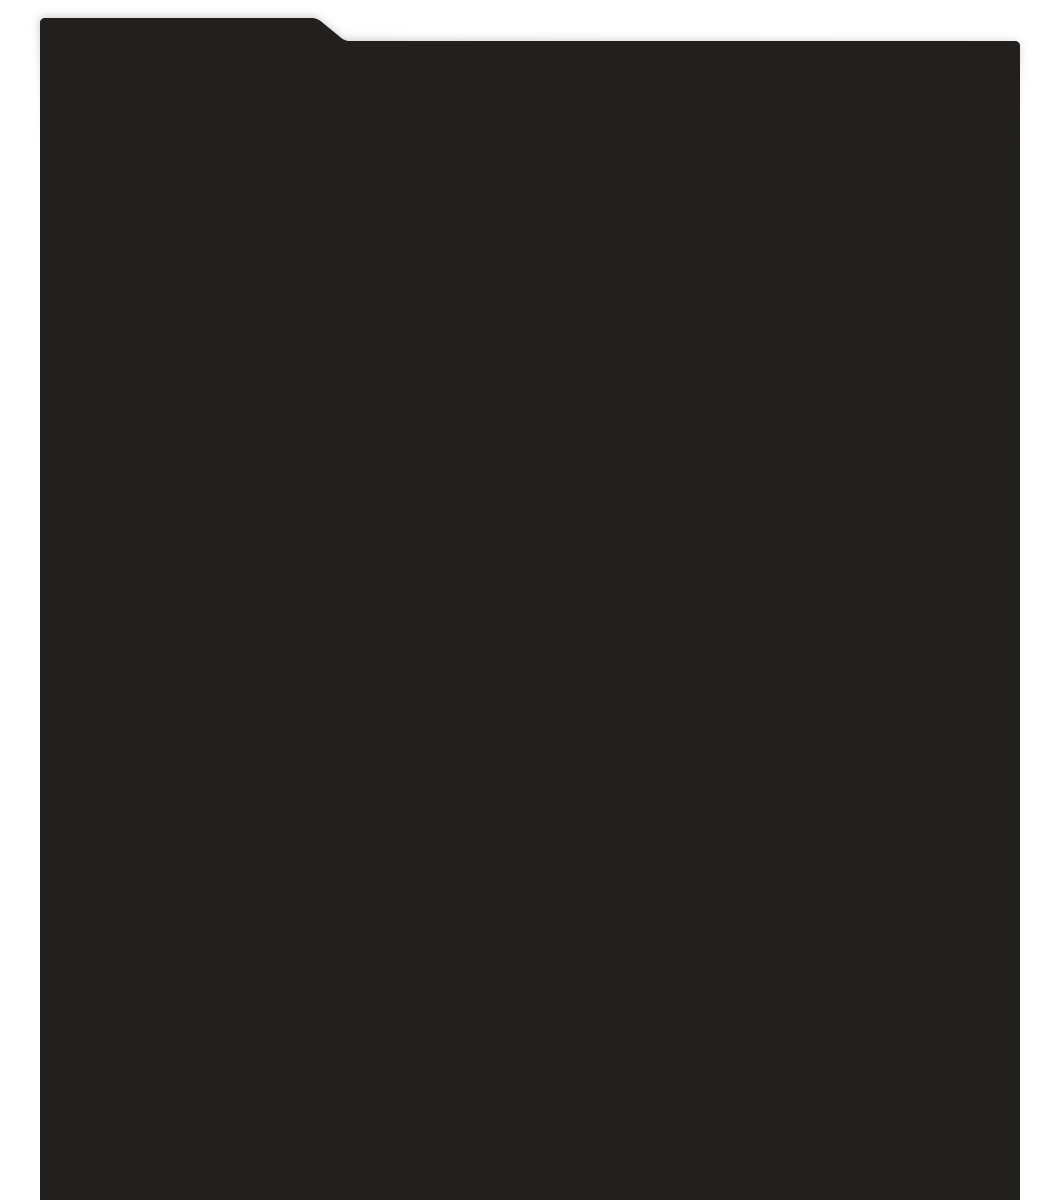
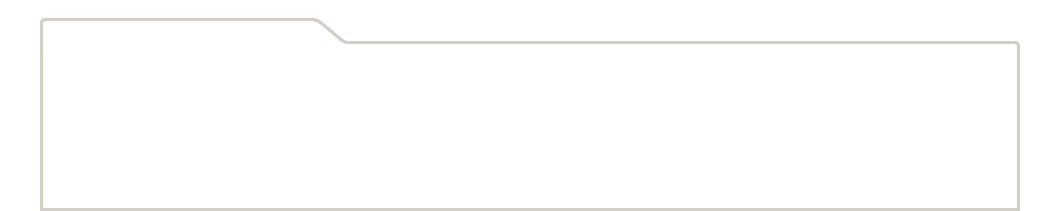
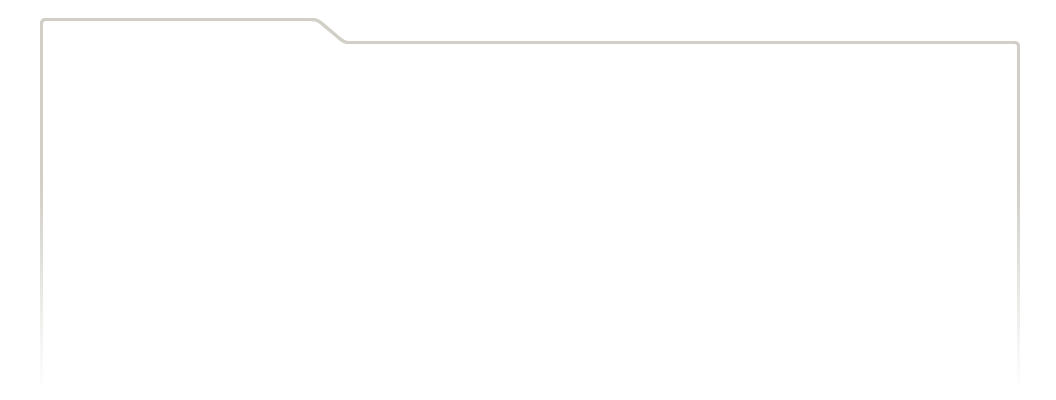
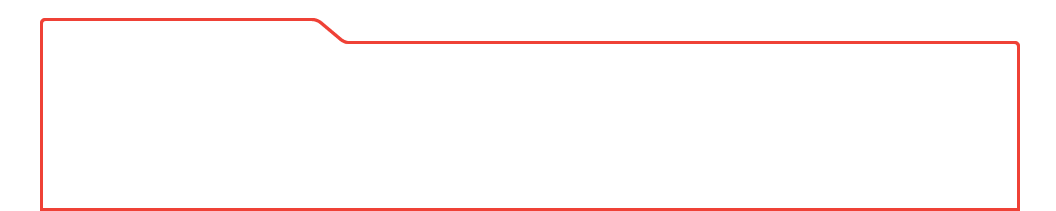
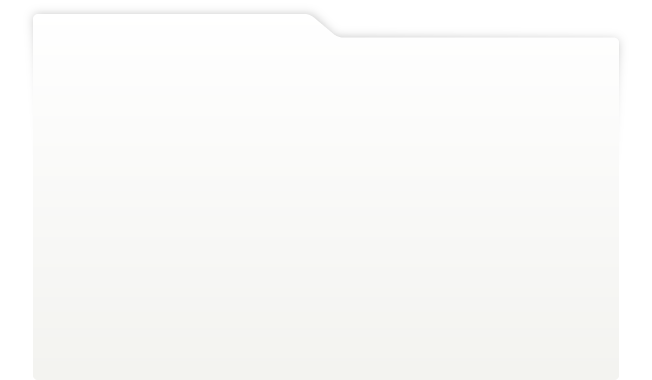
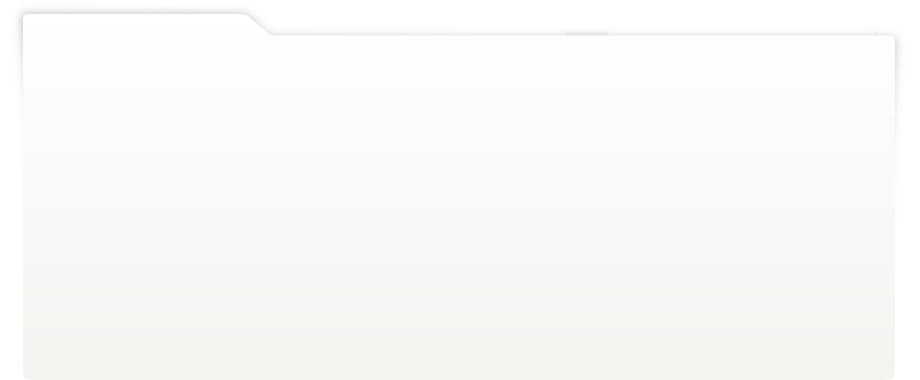
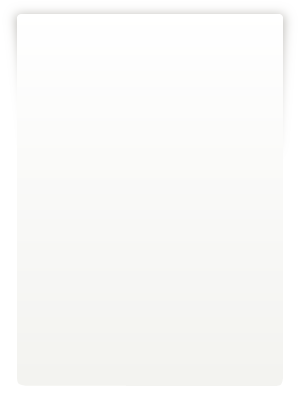
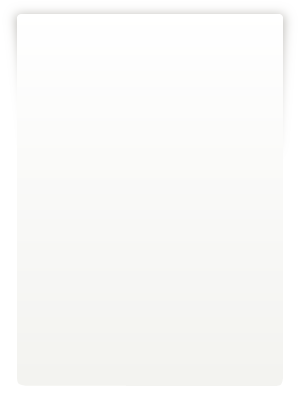
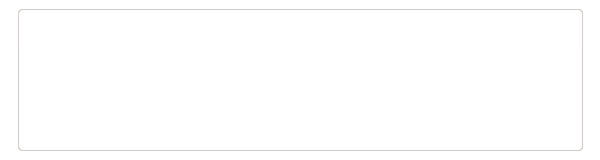
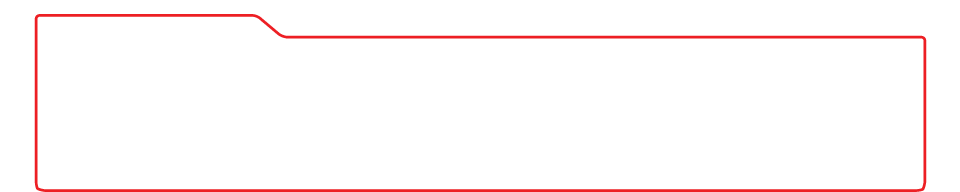
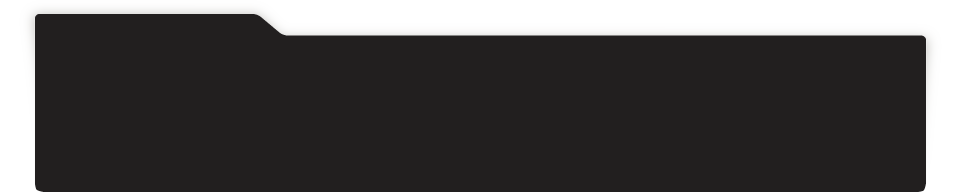
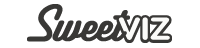
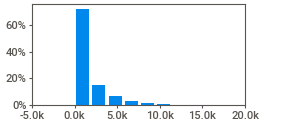
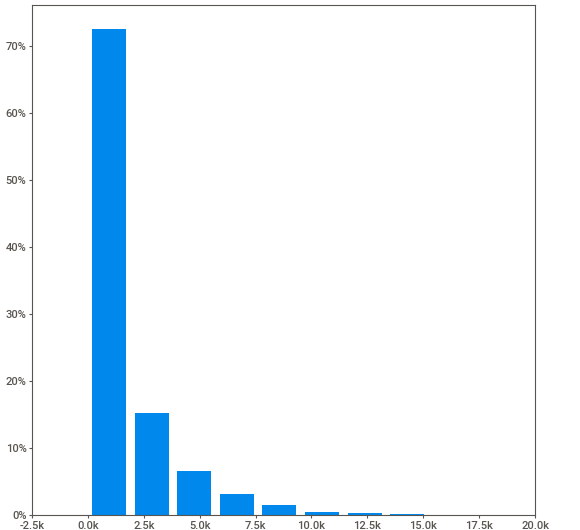
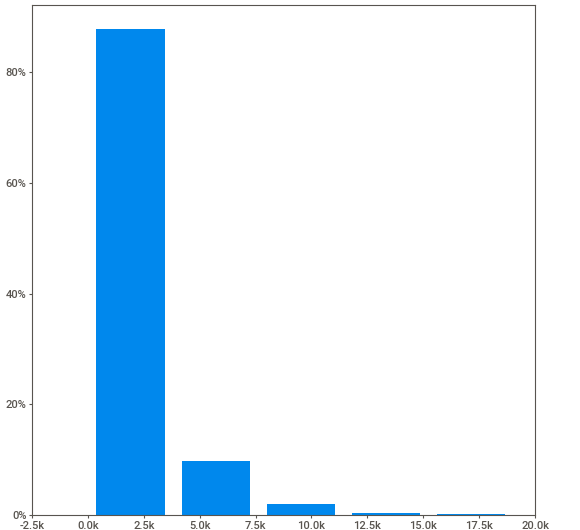
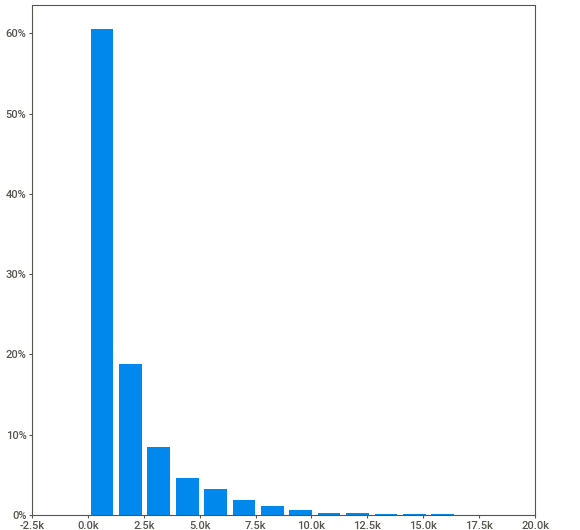
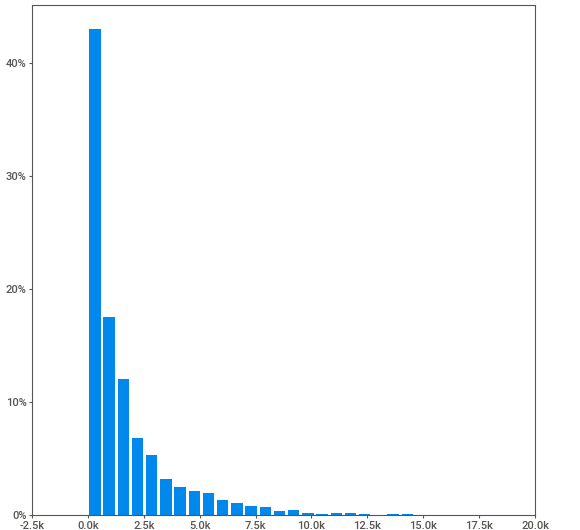
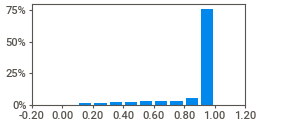
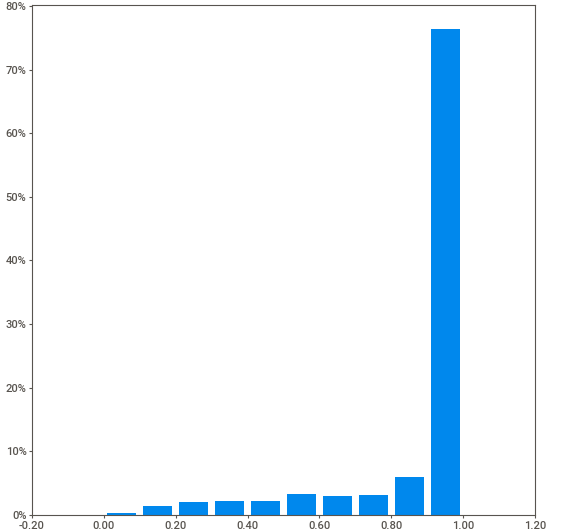
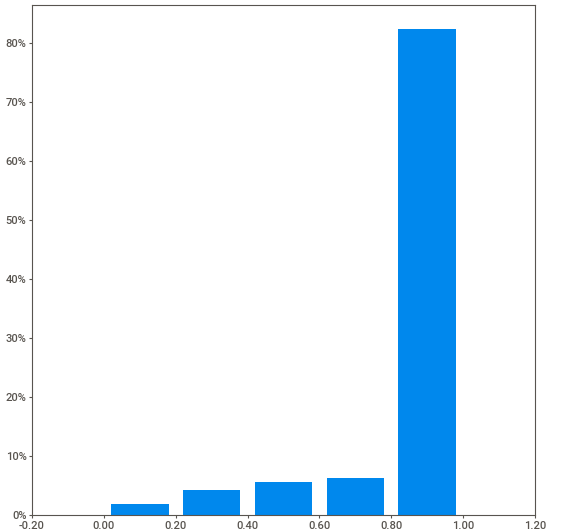
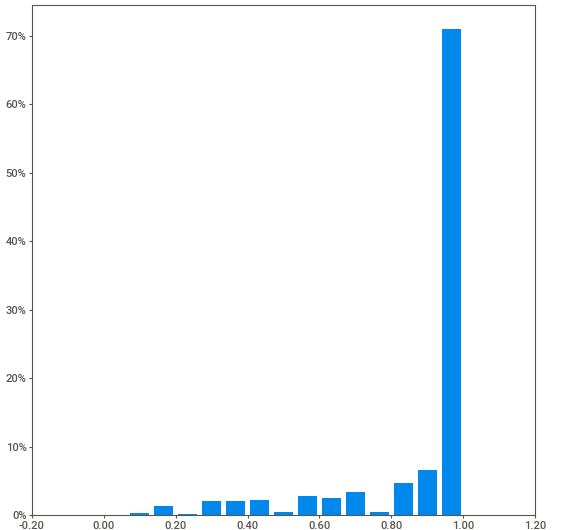
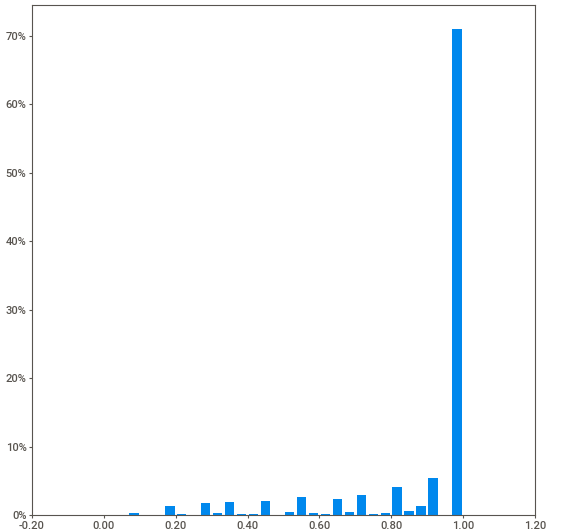
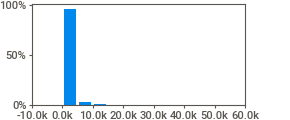
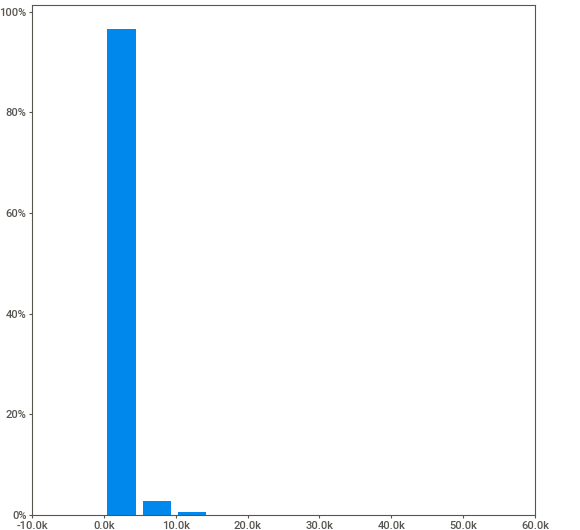
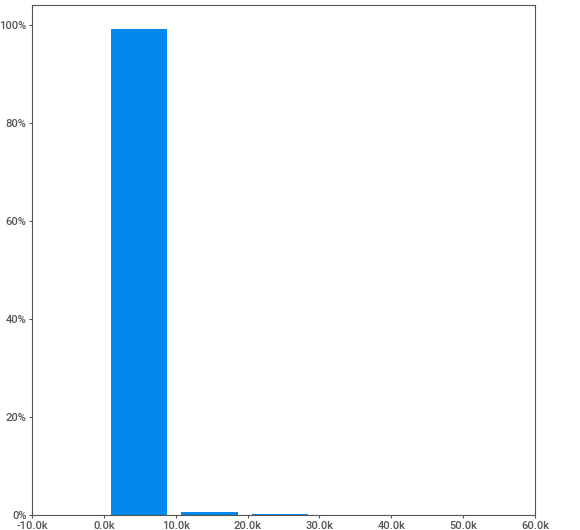
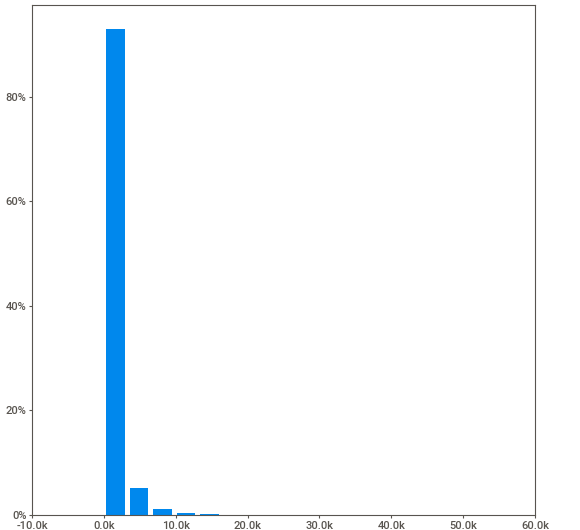
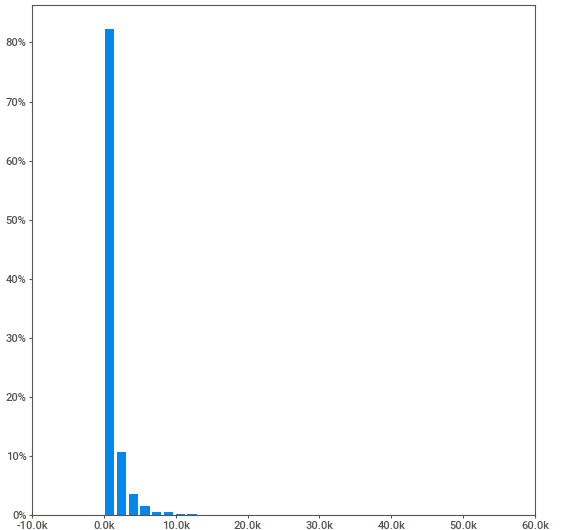
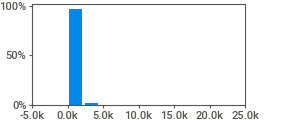
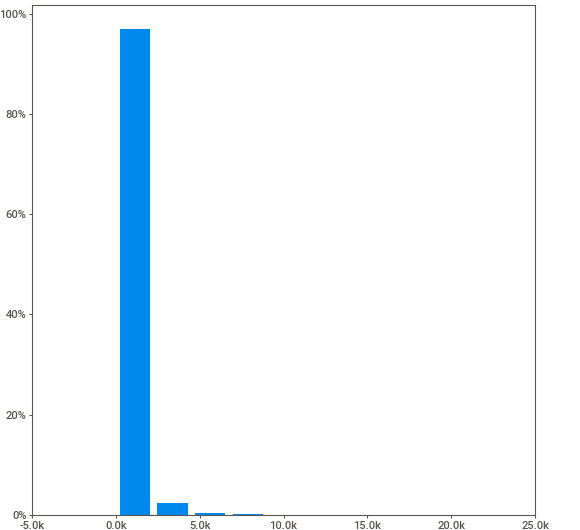
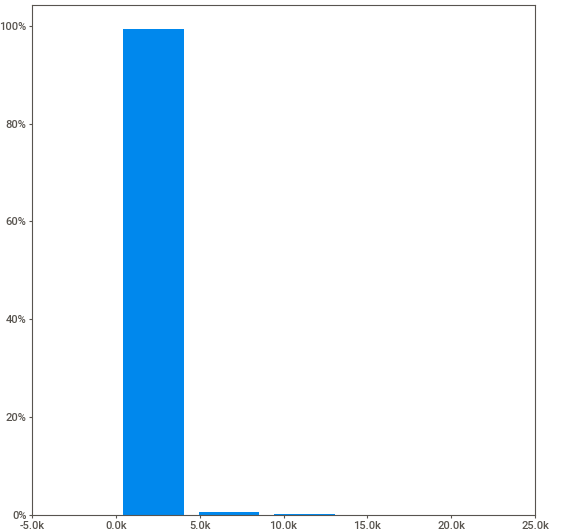
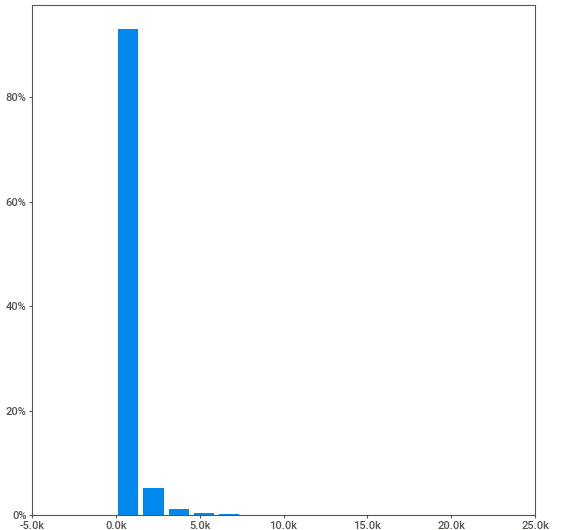
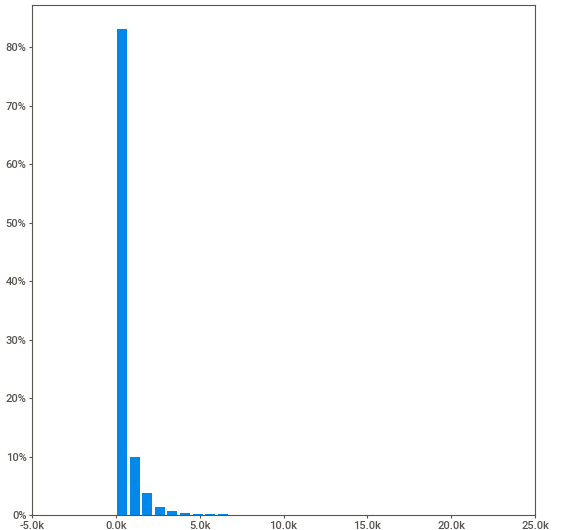
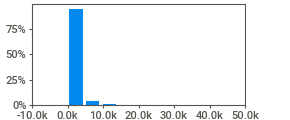
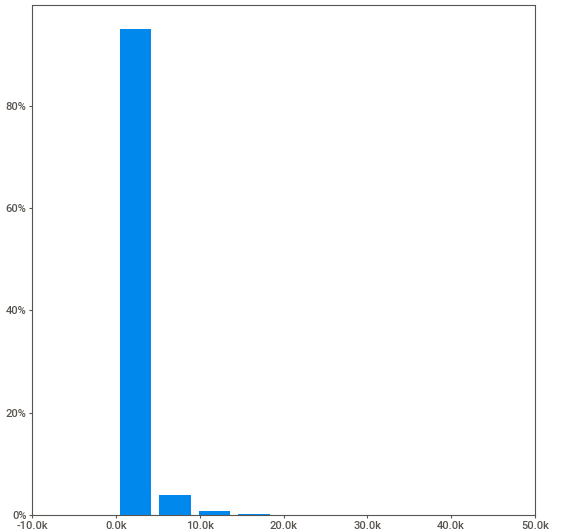
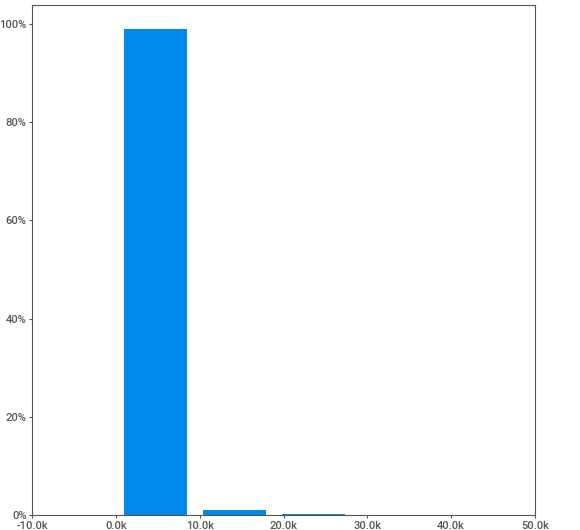
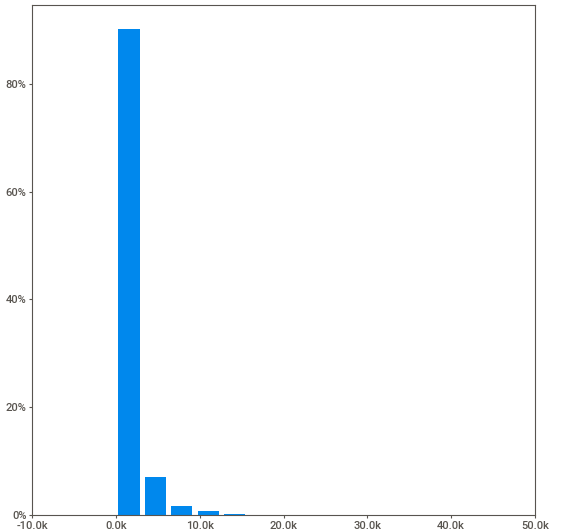
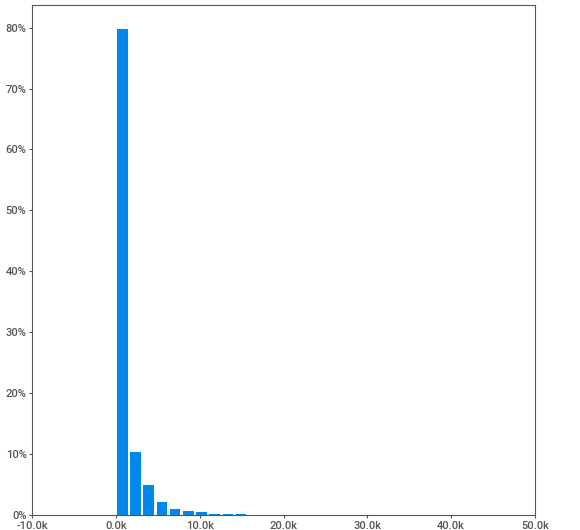
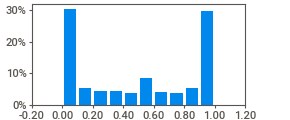
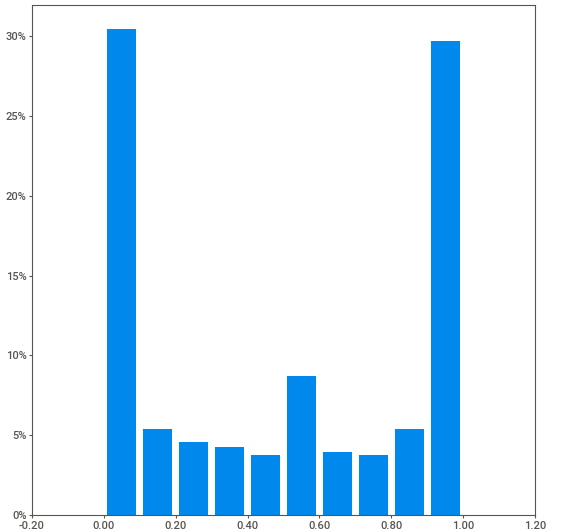
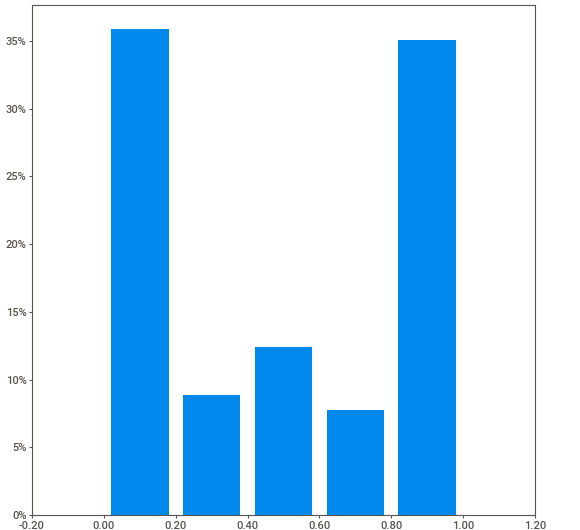
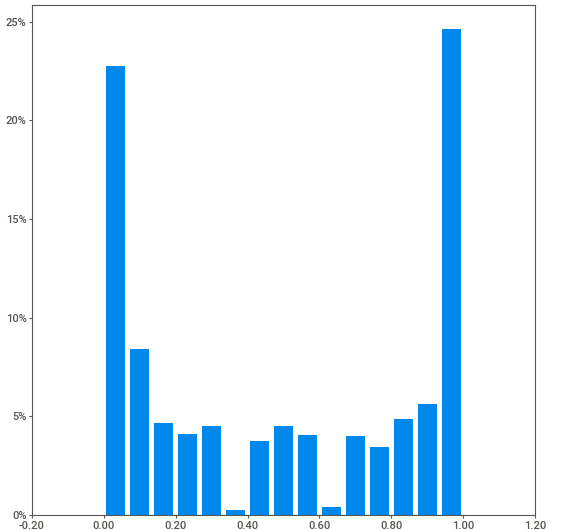
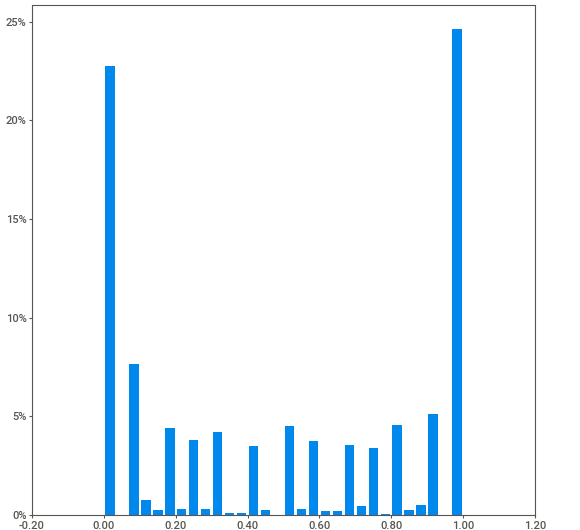
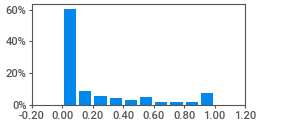
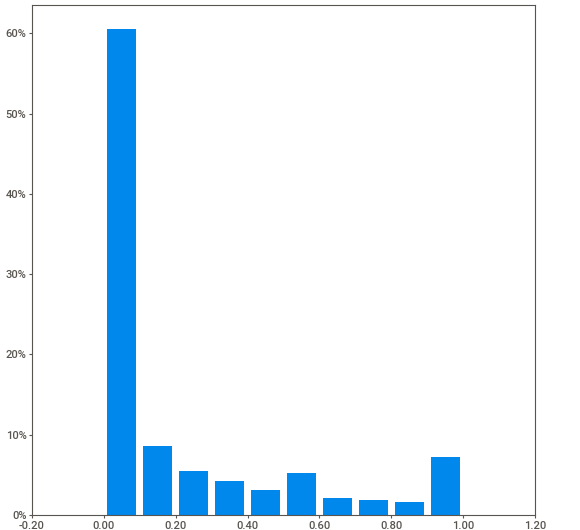
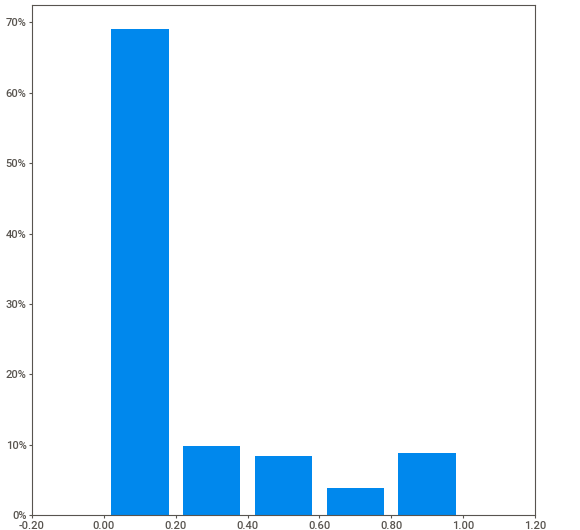
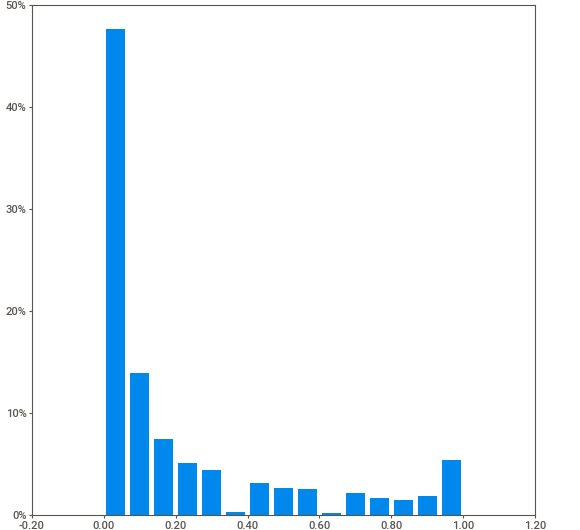
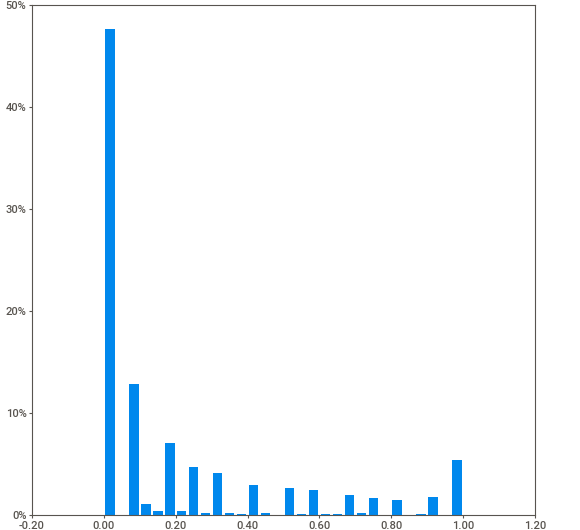
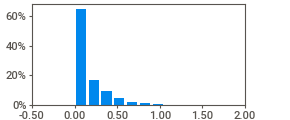
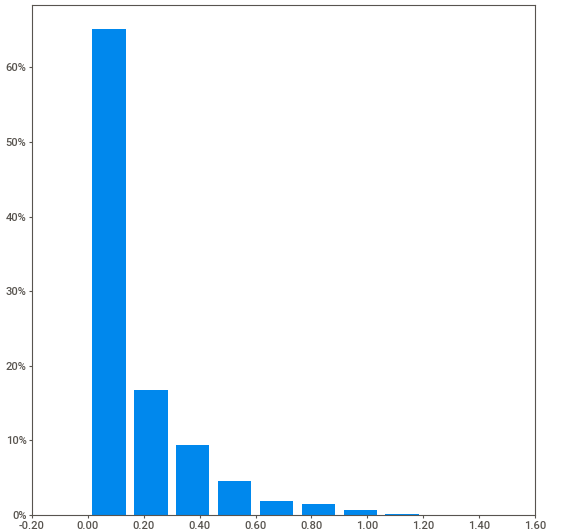
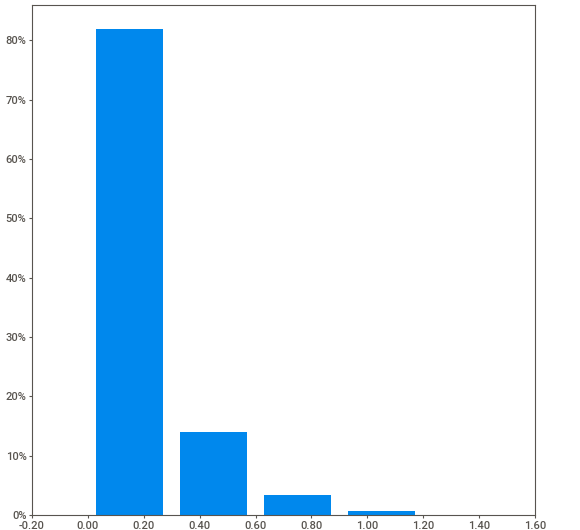
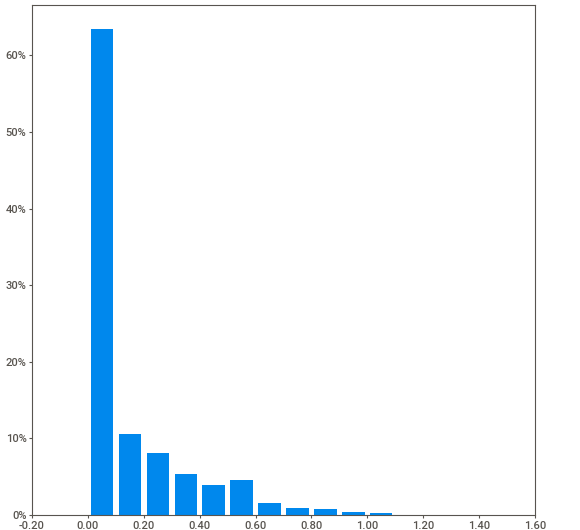
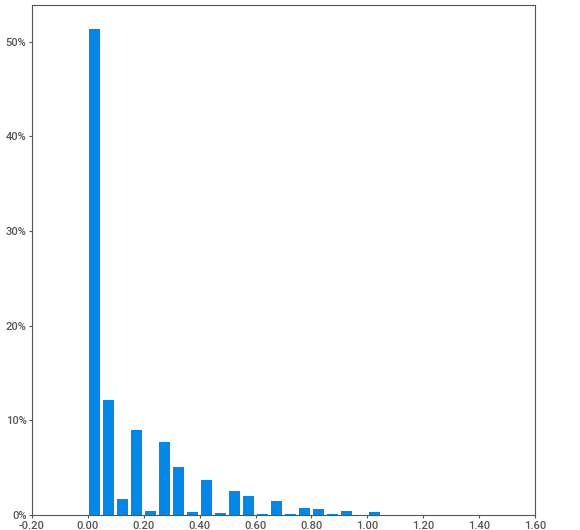
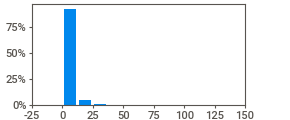
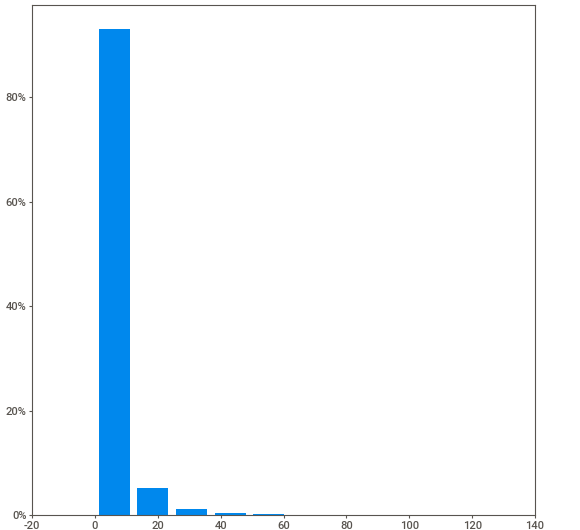
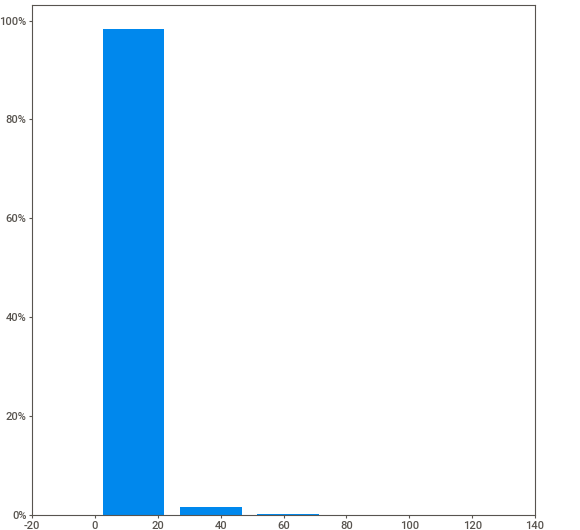
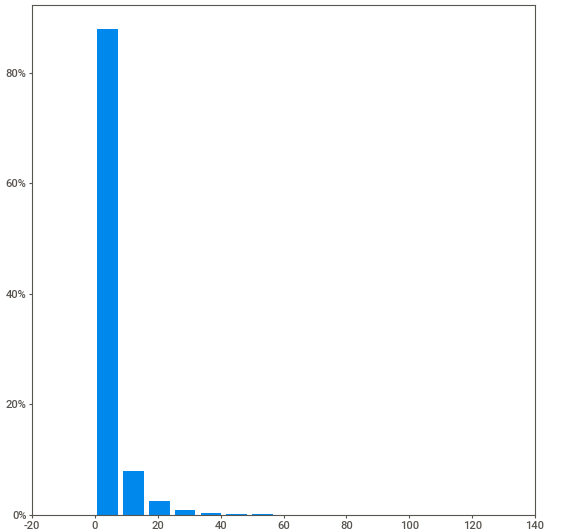
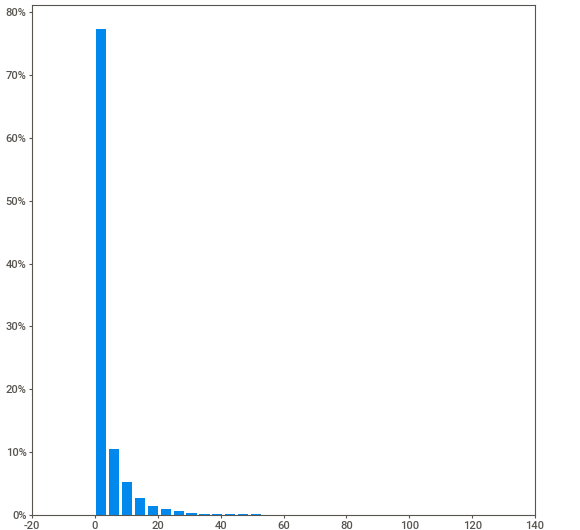
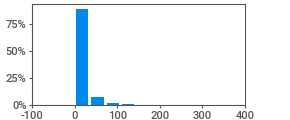
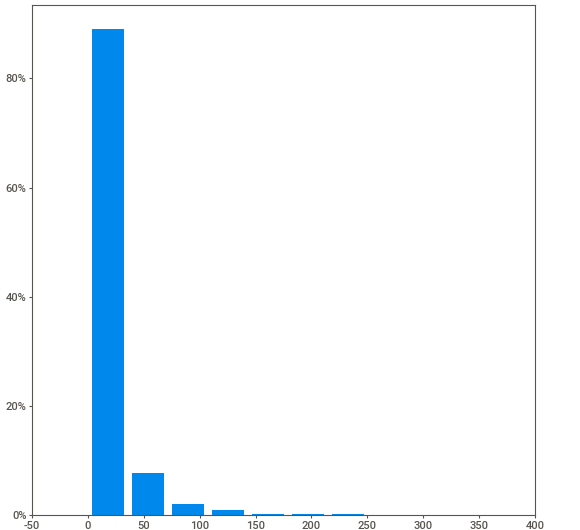
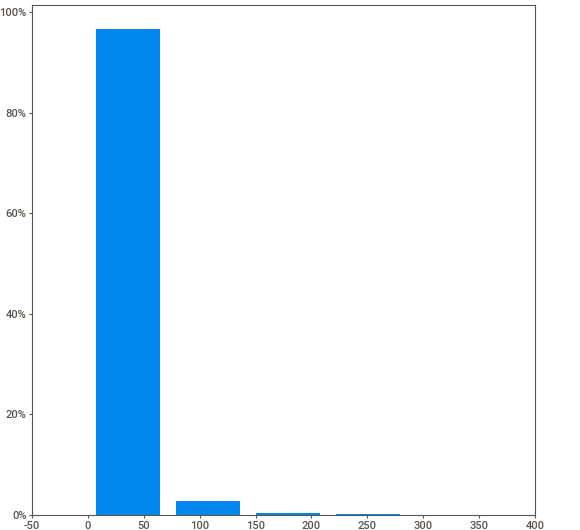
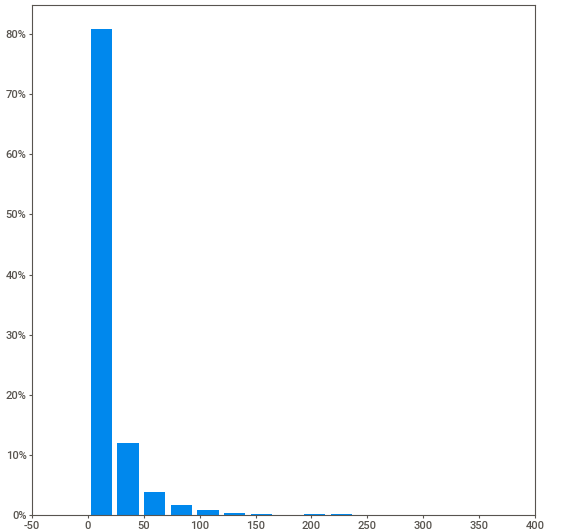
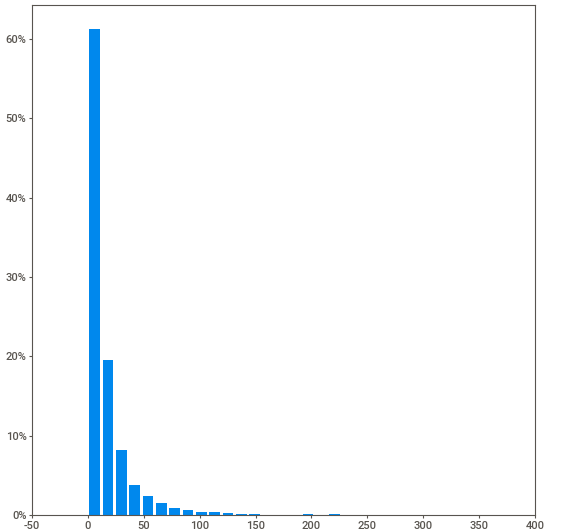
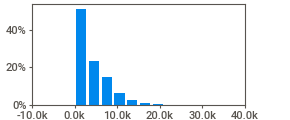
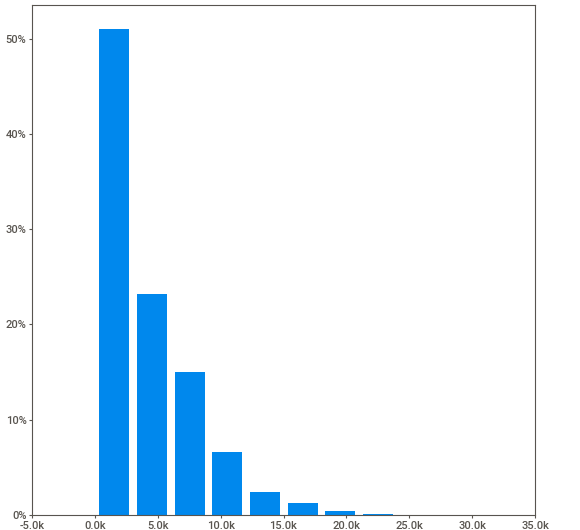
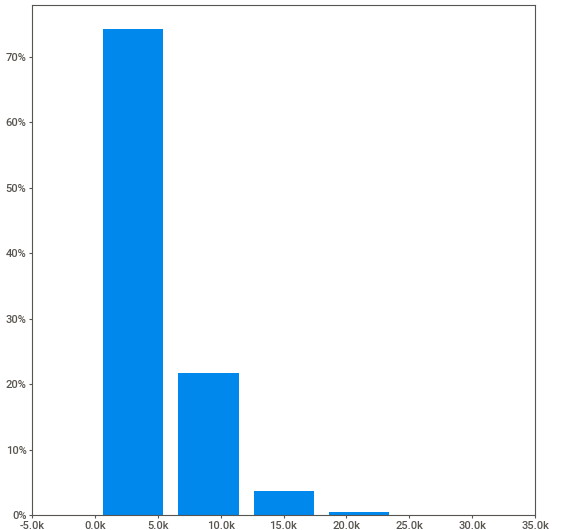
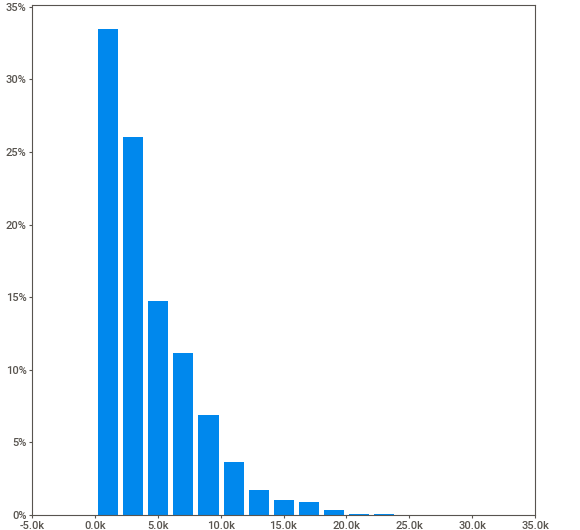
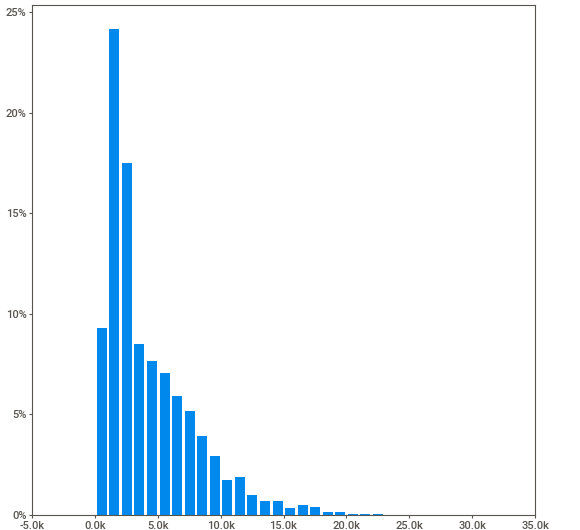
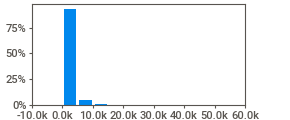
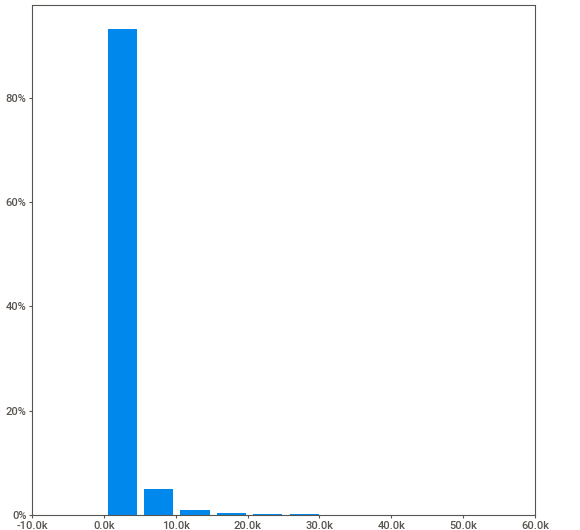
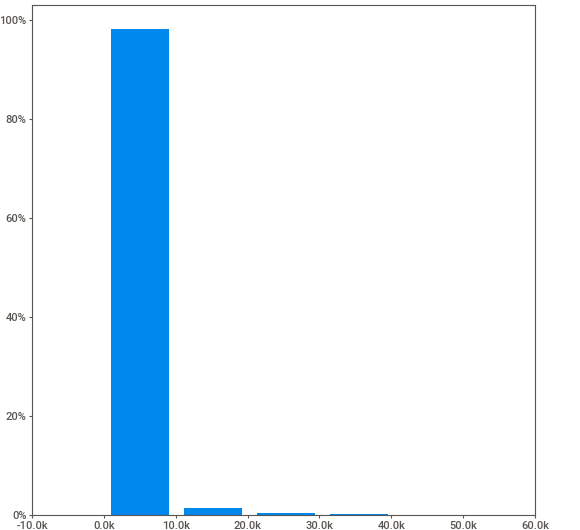
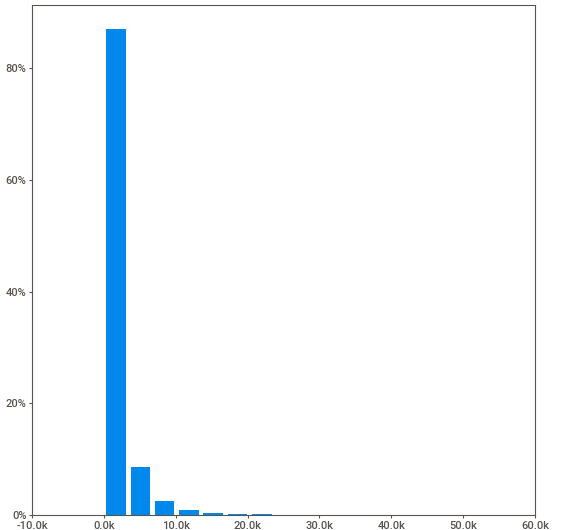
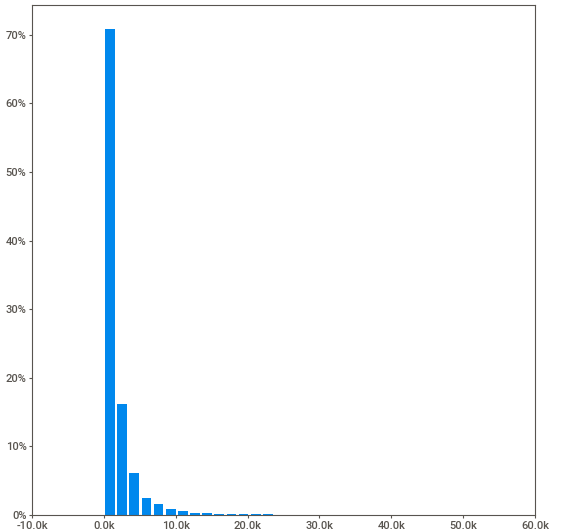
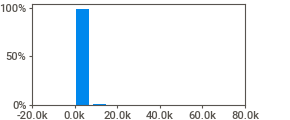
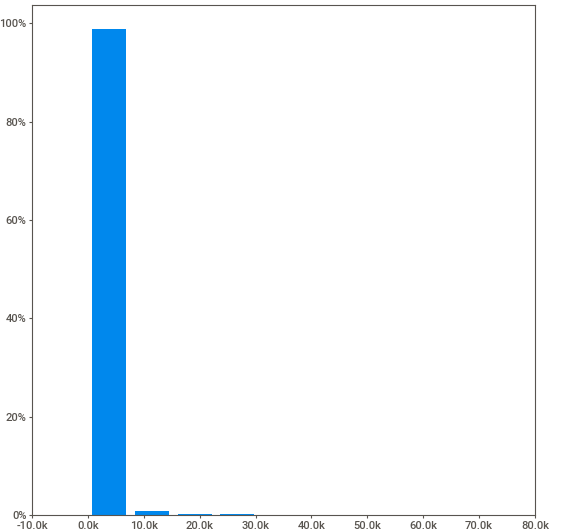
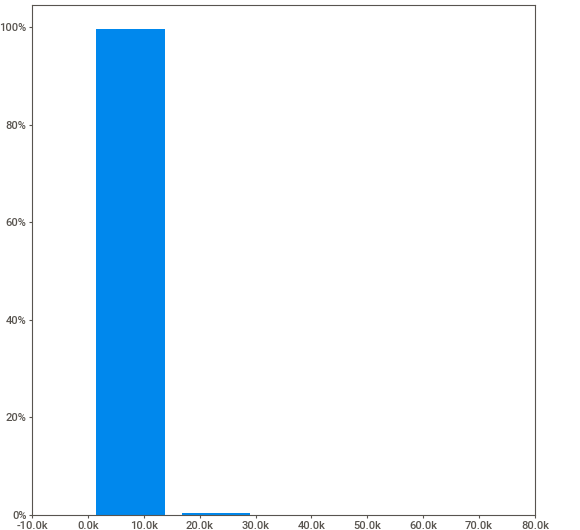
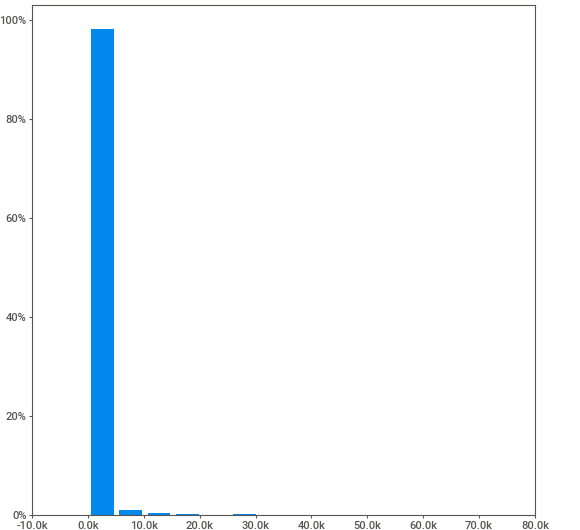
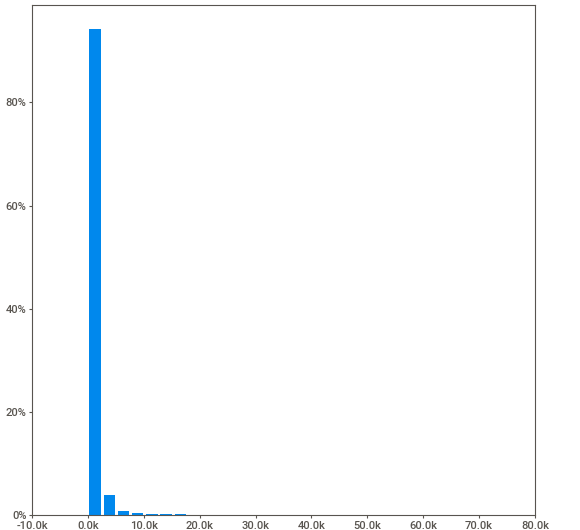
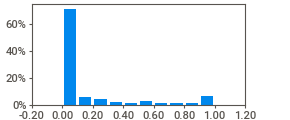
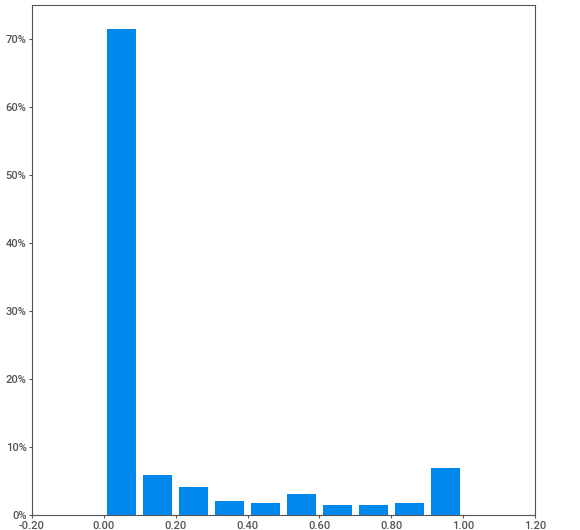
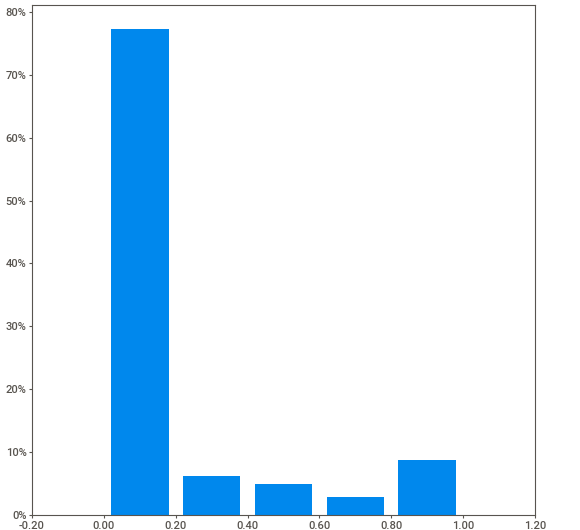
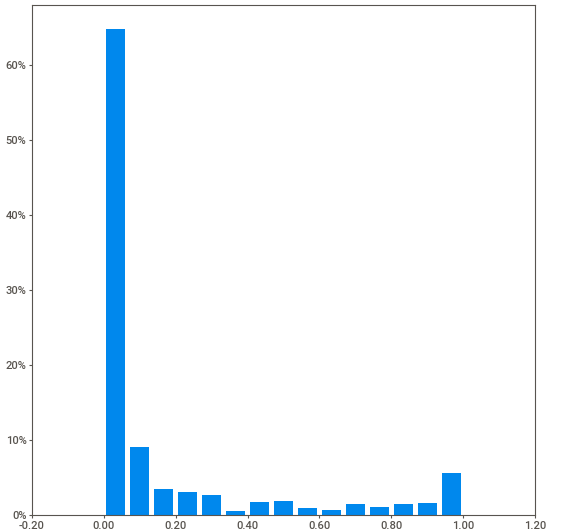
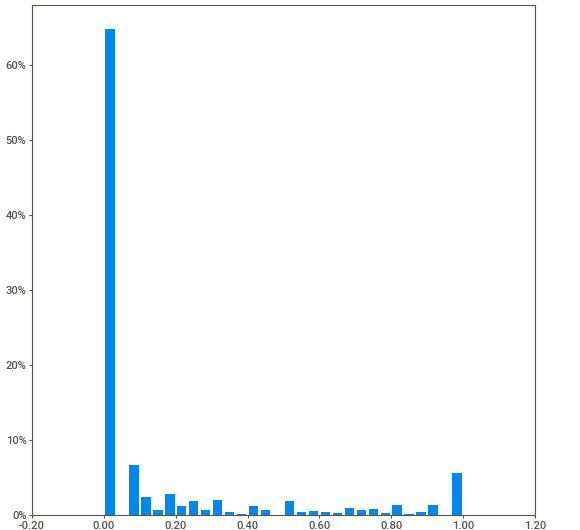
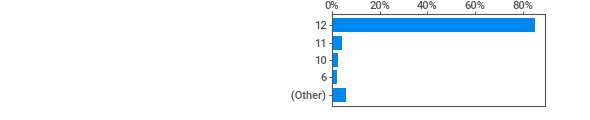
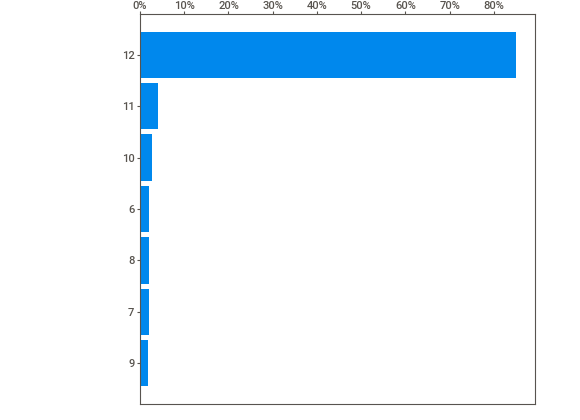
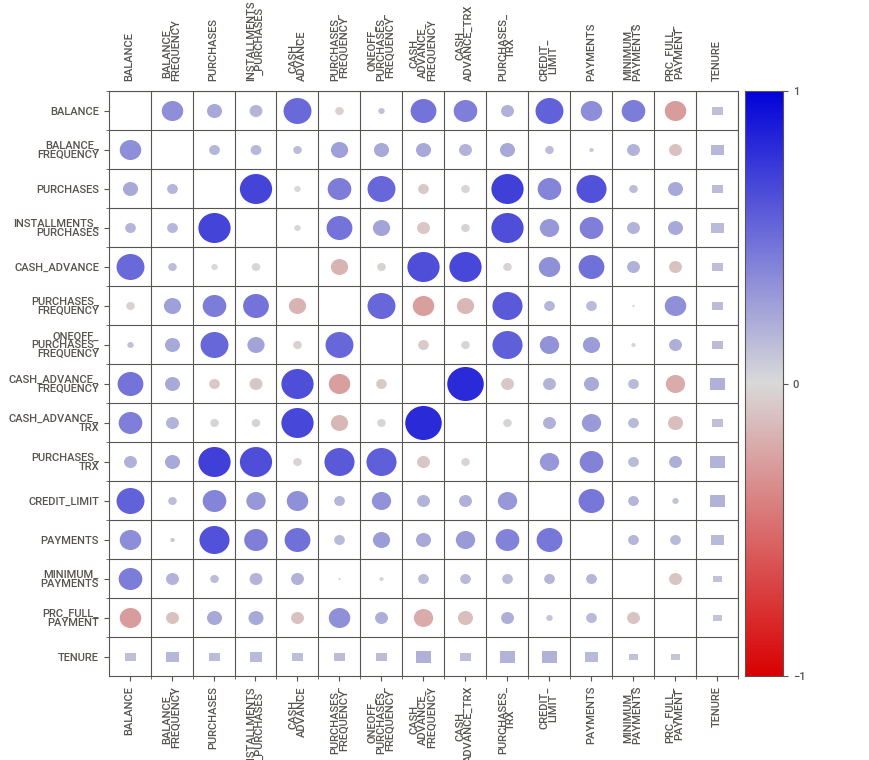
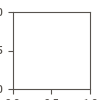

In [ ]:
import sweetviz as sv

report = sv.analyze(df)
report.show_notebook()

<Axes: xlabel='TENURE', ylabel='CREDIT_LIMIT'>

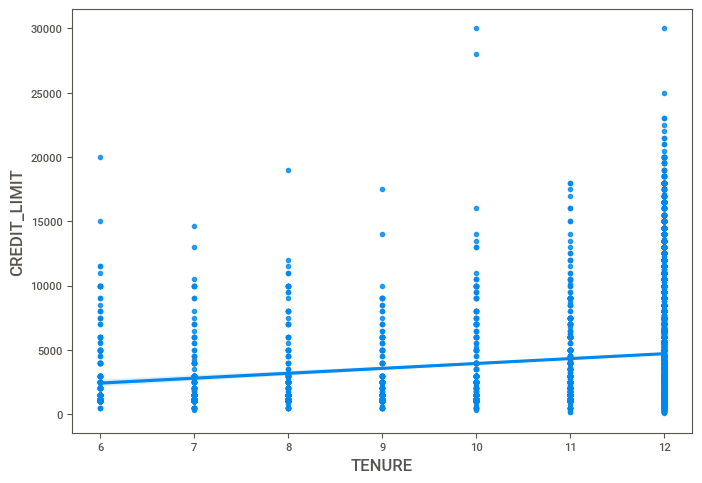

In [ ]:
sns.regplot(data = df, y = 'CREDIT_LIMIT', x = 'TENURE')

<Axes: xlabel='PAYMENTS', ylabel='CREDIT_LIMIT'>

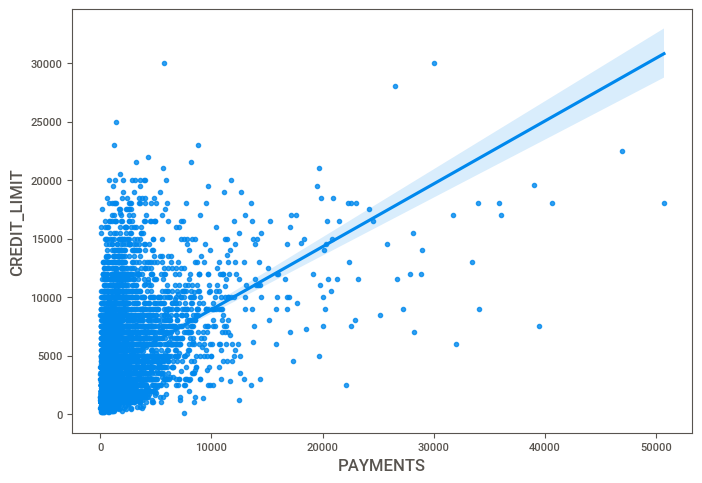

In [ ]:
sns.regplot(data = df, y = 'CREDIT_LIMIT', x = 'PAYMENTS')

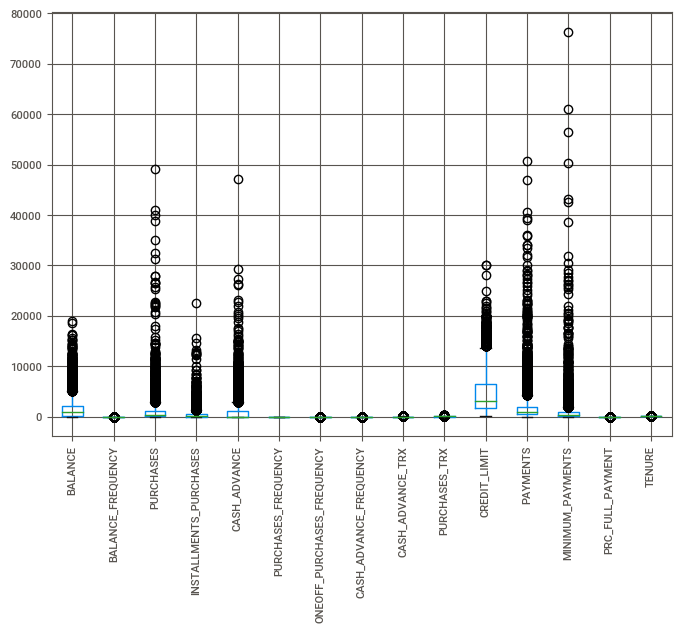

In [ ]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

<Axes: >

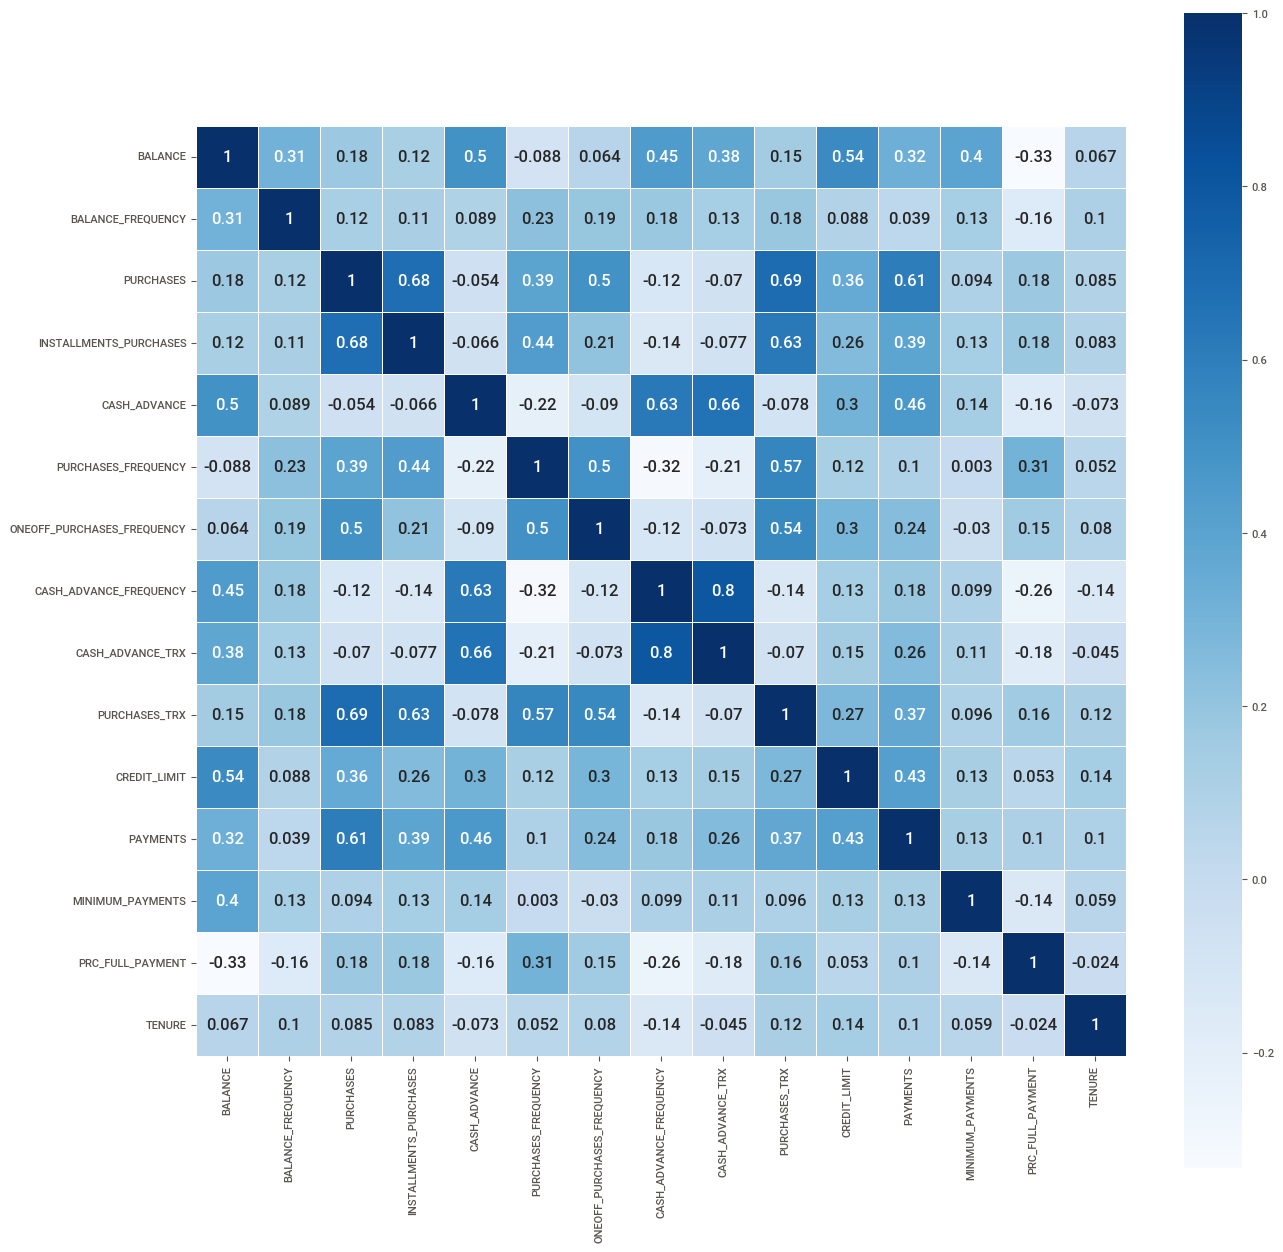

In [ ]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True, linewidths = 0.5)

# DATA PREPROCESSING

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df= df.drop(columns=['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'],axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

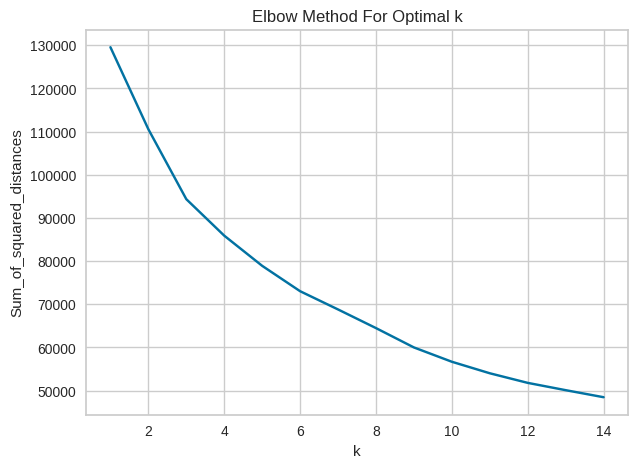

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(7,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

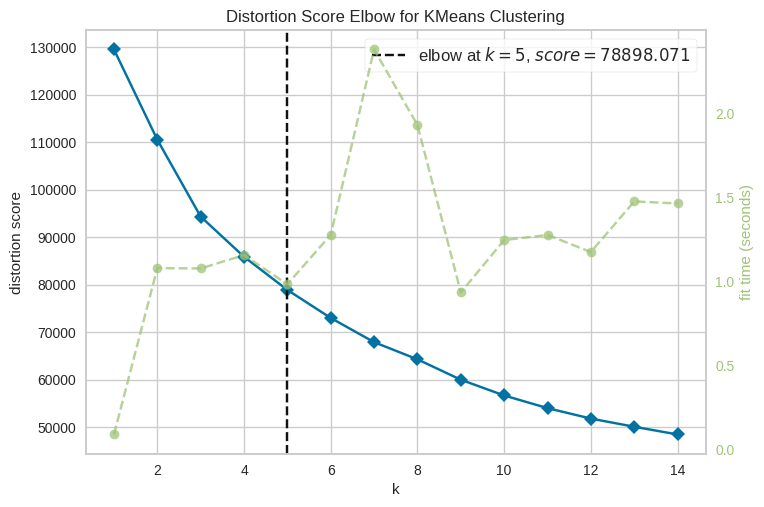

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(1, 15))
elbow.fit(scaled_df)
elbow.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(scaled_df)
kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
scaled_df[0:5]

array([[-0.74462486, -0.37004679, -0.42918384, -0.35482593, -0.46865549,
        -0.82076881, -0.68627958, -0.68195251, -0.47943688, -0.51762292,
        -0.96257545, -0.54394191, -0.30550763, -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, -0.45883904,  2.56855647,
        -1.2361389 , -0.68627958,  0.55702219,  0.09925796, -0.59705416,
         0.67720406,  0.79685226,  0.08768873,  0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, -0.45883904, -0.46865549,
         1.25607662,  2.6466512 , -0.68195251, -0.47943688, -0.12046673,
         0.81385235, -0.39950328, -0.09990611, -0.53772694,  0.35518066],
       [-0.37391041,  0.50540465, -0.46582465, -0.45883904, -0.46865549,
        -1.0284551 , -0.40853646, -0.68195251, -0.47943688, -0.55733854,
        -0.90791614, -0.3801648 , -0.26113056, -0.53772694,  0.35518066],
       [ 0.09955087,  0.50540465,  0.14206212,  0.99481504, -0.46865549,
         0.42533895, -0.68627958, -0.68195251, 

In [ ]:
clusters_kmeans = kmeans.labels_

df["Labels"] = clusters_kmeans

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2


In [ ]:
df['Labels'].value_counts()

1    3899
2    3181
3    1248
0     308
Name: Labels, dtype: int64